### Лабораторная №5. Кластеризация

#### Подготовка данных

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn import preprocessing
import numpy as np
from IPython.display import clear_output

! pip install seaborn  &>/dev/null

import matplotlib.pyplot as plt

import seaborn as sns
clear_output(wait=True)

import umap 
clear_output(wait=True)

/Users/esoboleva/Library/Python/3.8/lib/python/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/esoboleva/Library/Python/3.8/lib/python/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/esoboleva/Library/Python/3.8/lib/python/site-packages/umap/distances.

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

df.info()
# 'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# нормализуем 
def normalize_by_col(data, col):
    x_array = np.array(data[col])
    normalized_arr = preprocessing.normalize([x_array]).transpose()

    normalized = pd.DataFrame(normalized_arr)
    data[col] = normalized

normalize_by_col(df, 'sepal length (cm)')
normalize_by_col(df, 'sepal width (cm)')
normalize_by_col(df, 'petal length (cm)')
normalize_by_col(df, 'petal width (cm)')

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.070563,0.092542,0.027548,0.011502,0
1,0.067795,0.079322,0.027548,0.011502,0
2,0.065028,0.084610,0.025580,0.011502,0
3,0.063645,0.081966,0.029516,0.011502,0
4,0.069179,0.095186,0.027548,0.011502,0


In [30]:
iris_processed = df.iloc[:, : 4].to_numpy()
iris_processed.shape

(150, 4)

In [37]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(iris_processed.data)
embedding.shape

(150, 2)

Text(0.5, 1.0, 'UMAP projection of the Iris dataset')

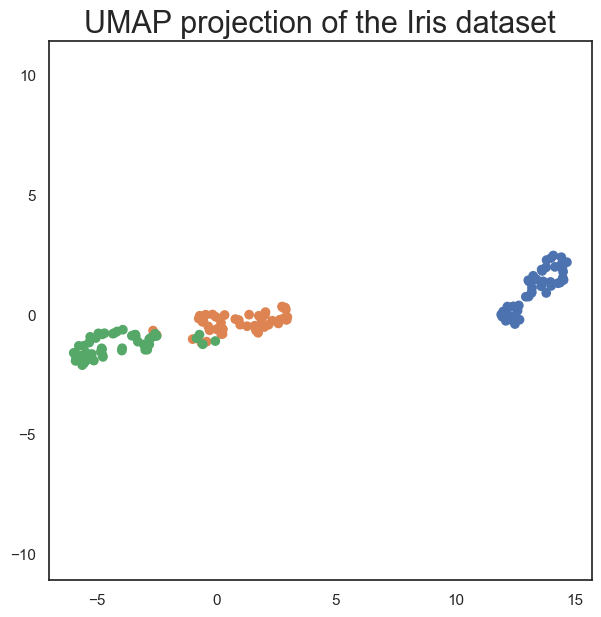

In [38]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,7)})

plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=22)

#### Задание
Выберем 1ый алгоритм - KMeans, 2ой - MeanShift Clustering

In [41]:
from sklearn.cluster import KMeans

res = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(embedding)

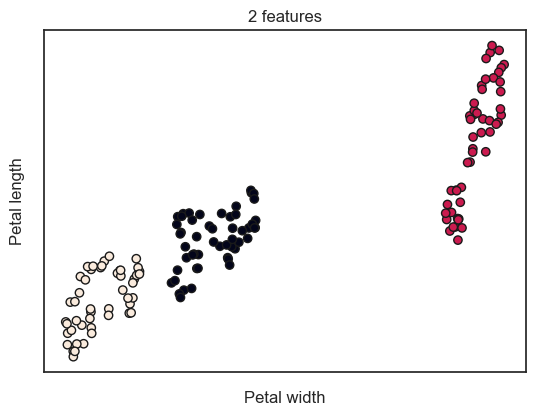

In [42]:
# iris_2d = df.iloc[:, : 2].to_numpy() # sepal len, sepal width
# iris_3d = df.iloc[:, : 3].to_numpy() # sepal len, sepal width, petal len

kmeans = KMeans(n_clusters=3, n_init="auto")

def plot_with_n_features(alg, X, n, title):
    fig = plt.figure(figsize=(14, 10))
    
    if n == 2:
        projection = None
    elif n == 3:
        projection = "3d"
    if n == 3:
        ax = fig.add_subplot(2, 2, 3, projection=projection, elev=48, azim=134)
    elif n == 2:
        ax = fig.add_subplot(2, 2, 2, projection=projection)
    
    alg.fit(X)
    labels = alg.labels_
    if n == 3:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor="k")
    elif n == 2:
        ax.scatter(X[:, 0], X[:, 1], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    if n == 3:
        ax.zaxis.set_ticklabels([])
        
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Petal length")
    
    if n == 3:
        ax.set_zlabel("Sepal length")
        
    ax.set_title(title)
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    plt.show()

plot_with_n_features(kmeans, embedding, 2, "2 features")

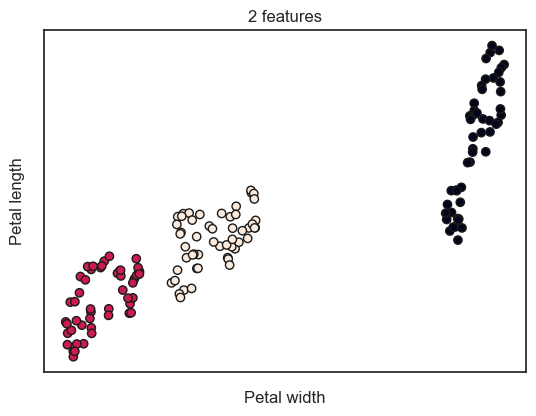

N clusters:  3


In [51]:
from sklearn.cluster import MeanShift
import sklearn.cluster

meanshift = MeanShift(bandwidth=1.5) # with bandwidth=1.5 get 3 clusters

plot_with_n_features(meanshift, embedding, 2, "2 features")

bw = sklearn.cluster.estimate_bandwidth(iris_3d)

n_clusters, _ = meanshift.cluster_centers_.shape
print("N clusters: ", n_clusters)

В качестве внешней меры выберем Rand Index, в качестве внутренней - Davies-Bouldin score

In [56]:
def plot_scores(range_, sc, title):
    plt.figure(figsize=(5, 5))
    plt.plot(range_, sc, linewidth=2, marker='o')
    plt.title(title)
    plt.xlabel("n_clasters")
    plt.ylabel("score")
    plt.show()

X = embedding
y = df.target.to_numpy() 

KMeans

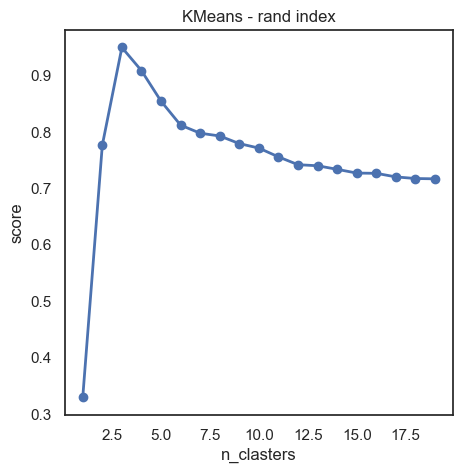

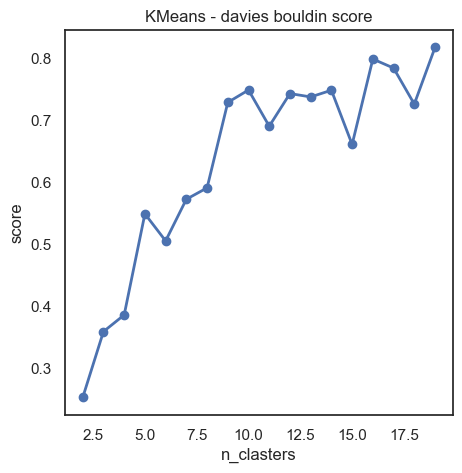

In [68]:
from sklearn.metrics import rand_score

scores = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init="auto")
    kmeans.fit(X)
    s = rand_score(y, kmeans.labels_)
    scores.append(s)

plot_scores(range(1, 20), scores, "KMeans - rand index")


from sklearn.metrics import davies_bouldin_score

scores = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, n_init="auto")
    kmeans.fit(X)
    s = davies_bouldin_score(X, kmeans.labels_)
    scores.append(s)

plot_scores(range(2, 20), scores, "KMeans - davies bouldin score")

MeanShift

Best bw:  1.577777777777778  with score  0.9495302013422818


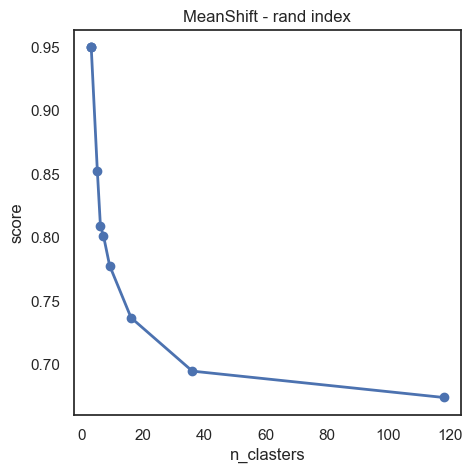

Best bw:  0.6666666666666666  with score  0.7040654890042087


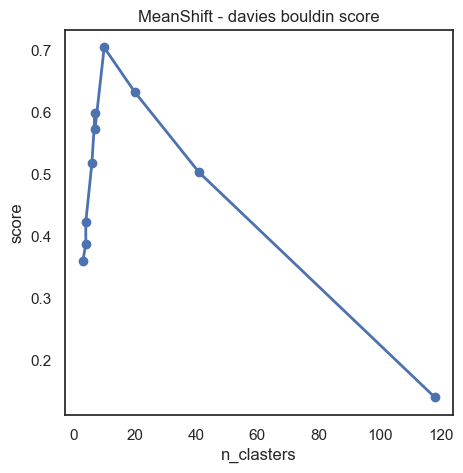

In [74]:
scores = []

max_score = 0
best_bw = 0

n_clusters = []
for i in np.linspace(1e-1, 2, num=10):
    ms = MeanShift(bandwidth=i)
    ms.fit(X)
    s = rand_score(y, ms.labels_)
    if s > max_score:
        max_score = s
        best_bw = i
    scores.append(s)
    n_clusters.append(ms.cluster_centers_.shape[0]) # cluster_centers_ndarray of shape (n_clusters, n_features)

print("Best bw: ", best_bw, " with score ", max_score)

plot_scores(n_clusters, scores, "MeanShift - rand index")


n_clusters = []
scores = []
max_score = 0
best_bw = 0
for i in np.linspace(0.1, 1.8, num=10):
    ms = MeanShift(bandwidth=i)
    ms.fit(X)
    s = davies_bouldin_score(X, ms.labels_)
    if s > max_score:
        max_score = s
        best_bw = i
    scores.append(s)
    n_clusters.append(ms.cluster_centers_.shape[0])
    

print("Best bw: ", best_bw, " with score ", max_score)

plot_scores(n_clusters, scores, "MeanShift - davies bouldin score")